<a href="https://colab.research.google.com/github/YangTaeSung/CAU-MachineLearning/blob/master/assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100
18


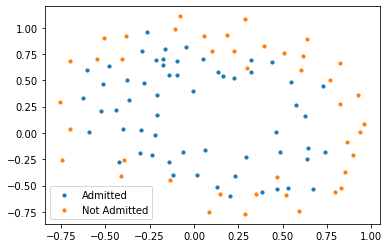

In [59]:
'''
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fmin_tnc


def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df


if __name__ == "__main__":
    # load the data from the file
    load_data = load_data("data-nonlinear.txt", None)
    data = load_data[:100] # 100번 인덱스까지 training data
    testing_data = load_data.iloc[100:118, 0:3] # 나머지 testing data

    print(len(data))
    print(len(testing_data))

    # xy = feature values, all the columns except the last column
    xy = data.iloc[:, :-1]

    # label = target values, last column of the data frame
    label = data.iloc[:, -1]

    # filter out the applicants that got admitted
    admitted = data.loc[label == 1]

    # filter out the applicants that din't get admission
    not_admitted = data.loc[label == 0]

    # plots
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
    plt.legend()
    plt.show()
    

In [0]:
m = len(data) # data 개수
cycle = 1000 # cycle 수

# theta값 초기화
theta = []

for i in range(m):
  theta.append(0)


In [0]:
def h(x):
    # 0과 1 사이의 모든 실제 값을 매핑하는 데 사용되는 활성화 함수 (sigmoid)
    return 1 / (1 + np.exp(-x))

def costFunction(thetaArray, trainArray, labelArray):
    J = (-1/m) * np.sum(np.multiply(labelArray, np.log(sigmoid(np.multiply(trainArray,thetaArray)))) 
        + np.multiply((1-labelArray), np.log(1 - sigmoid(np.multiply(trainArray,thetaArray))))
    return J

In [61]:
# Gradient descent 시작
for i in range(cycle):

  loss = costFunction()


  # Optimization은 Training data로 진행
  thetaZero = thetaZero - learningLate / noiseNum * np.sum((thetaOne*x + thetaTwo*y + thetaThree*z - h + thetaZero))
  thetaOne = thetaOne - learningLate / noiseNum * np.sum((thetaOne*x + thetaTwo*y + thetaThree*z - h + thetaZero)*x)
  thetaTwo = thetaTwo - learningLate / noiseNum * np.sum((thetaOne*x + thetaTwo*y + thetaThree*z - h + thetaZero)*y)
  thetaThree = thetaThree - learningLate / noiseNum * np.sum((thetaOne*x + thetaTwo*y + thetaThree*z - h + thetaZero)*z)
  
  # Loss를 표현한 그래프의 범위가 너무 커서 Loss의 변이가 명확히 확인되지 않아 첫번째 사이클은 그래프에서 제외시켰습니다. 
  if i > 0:
      jTestingForGraph.append(jTesting)
      iForGraph.append(i)
      jForGraph.append(j)
  
  if i == 3999:
      jTestingForGraph.append(jTesting)
      iForGraph.append(i)
      jForGraph.append(j)
  
  newThetaZero.append(thetaZero)
  newThetaOne.append(thetaOne)
  newThetaTwo.append(thetaTwo)
  newThetaThree.append(thetaThree)
  
  if i % 200 == 0:
        print('cycle : {:10d} cost: {:10f} thetaZero: {:10f} thetaOne: {:10f} thetaTwo: {:10f} thetaThree: {:10f}'.format(i, j, thetaZero, thetaOne, thetaTwo, thetaThree))

finalY = thetaZero + thetaOne * x + thetaTwo * y + thetaThree * z

NameError: ignored

In [0]:
'''X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))'''

In [0]:
'''def sigmoid(x):
    # 0과 1 사이의 모든 실제 값을 매핑하는 데 사용되는 활성화 함수 
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # 가중 된 입력 합계를 계산합니다.
    return np.dot(x, theta)

def costFunction(theta, X_train, Y_train):
    J = (-1/m) * np.sum(np.multiply(Y_train, np.log(sigmoid(np.multiply(X_train,theta)))) 
        + np.multiply((1-Y_train), np.log(1 - sigmoid(np.multiply(X_train,theta))))
    return J

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))
    '''

In [0]:
'''
def prediction(w, Data):
    pred = []
    z = np.dot(w,Data)
    a = sigmoid(z)
    for i in range(0,len(a[0])):
        if (a[0][i] > 0.5): 
            pred.append(1)
        elif (a[0][i] <= 0.5):
            pred.append(-1)
    return pred
'''

'''def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)
    '''

In [0]:
'''def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]
parameters = fit(X, y, theta)
'''

In [0]:
'''x_values = [np.min(X[:, 1]), np.max(X[:, 2])]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]
print(x_values)
print(y_values)


plt.plot(x_values, y_values, label='Decision Boundary')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()
'''